In [1]:
using Pkg, Revise
Pkg.activate("../.")

  Activating project at `~/MEGA/EMAP/Diagrams.jl`


In [2]:
# using GeometricalPredicates
using LinearAlgebra
using GeometryBasics
using Plots
using BenchmarkTools

In [150]:
"""
    plotvec!(v::Vector{<:Real})
Auxiliary function to plot multiple vectors starting
from the origin.
For a list of vectors [v1,v2,v3], we have that
`plotvec!([v1,v2,v3])` plots each vector starting from the origin.
"""
function plotvec!(v::Vector{<:Real})
    plotvec!([v])
end
function plotvec!(v::Vector{<:Vector})
    va = VectorOfArray(v)
    zvec = zeros(size(v)[1],2)[:,1]
    quiver!(zvec, zvec, quiver = (va[1,:],va[2,:]))
end

pointtovector(p::Point) = collect(p.data)

pointtovector (generic function with 1 method)

In [161]:
pointtovector.([a,b,c])

3-element Vector{Vector{Float64}}:
 [-1.5, -0.5]
 [0.5, 1.5]
 [1.0, -0.5]

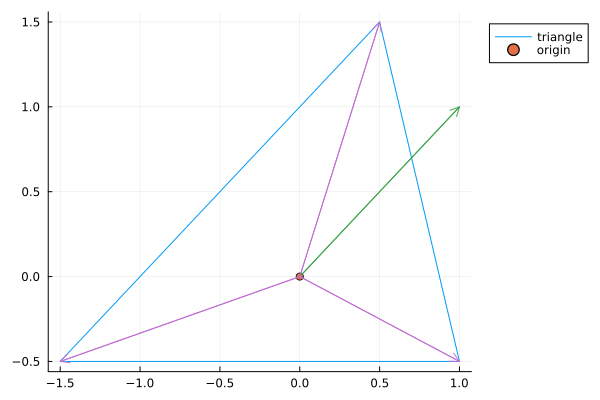

In [179]:
a = Point(-1.5,-0.5)#+Point(10,10)
b = Point(0.5,1.5)
c = Point(1.0,-0.5)
v = [1,1]

t = Triangle(a,b,c)

coordx(t::AbstractGeometry) = [x[1] for x in coordinates(t)]
coordy(t::AbstractGeometry) = [x[2] for x in coordinates(t)]

x = vcat(coordx(t),t.points[1][1])
y = vcat(coordy(t),t.points[1][2])
plot(x,y, label = "triangle")
scatter!([0],[0],label="origin", legend=:outertopright)
# quiver!([0],[0],quiver=([1],[1]))
plotvec!(v)
plotvec!(pointtovector.([a,b,c]))

In [180]:
max(dot(a,v),dot(b,v),dot(c,v))

@btime maximum([dot(p,v) for p in t.points])
@btime maximum.(dot.(t.points, Ref(v)))
@btime mapreduce(p->dot(p,v),max,t.points)


  1.267 μs (22 allocations: 944 bytes)
  946.913 ns (9 allocations: 496 bytes)
  364.562 ns (12 allocations: 432 bytes)


2.0

In [187]:
support(t::AbstractGeometry,v::Vector) = mapreduce(p->dot(p,v),max,t.points)
envelope(t::AbstractGeometry, v::Vector) = support(t,normalize(v))

envelope (generic function with 1 method)

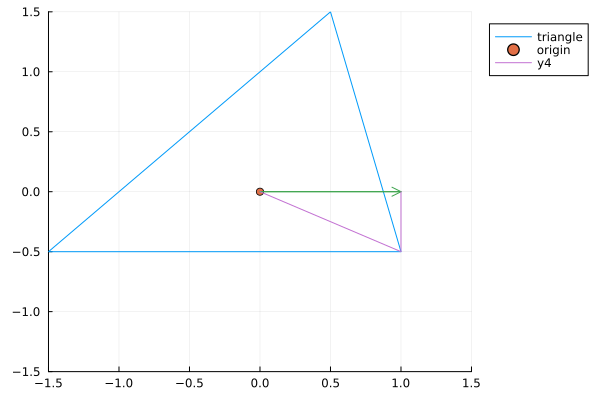

In [193]:
v = [1,0]
plot(x,y, label = "triangle", xlim=(-1.5,1.5), ylim=(-1.5,1.5))
scatter!([0],[0],label="origin", legend=:outertopright)
plotvec!(v)

venv = envelope(t,v) * normalize(v)
plot!([0,c[1],venv[1]], [0,c[2], venv[2]])

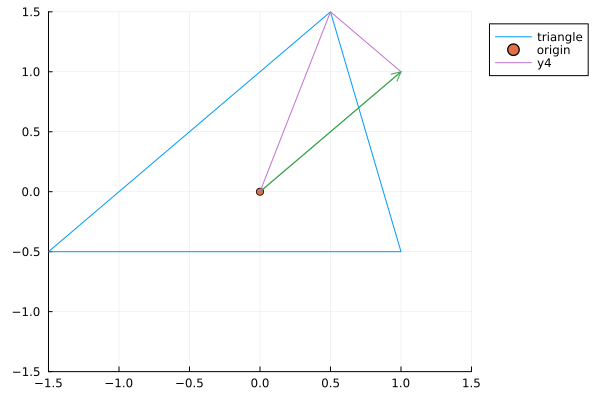

In [194]:
v = [1,1]
plot(x,y, label = "triangle", xlim=(-1.5,1.5), ylim=(-1.5,1.5))
scatter!([0],[0],label="origin", legend=:outertopright)
plotvec!(v)

venv = envelope(t,v) * normalize(v)
plot!([0,b[1],venv[1]], [0,b[2], venv[2]])

In [13]:
envelope(t,v)

1.414213562373095